# 📖 Import Library 

In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For scaling numerical features
from sklearn.linear_model import LogisticRegression  # The logistic regression model
from sklearn.metrics import classification_report, accuracy_score  # For model evaluation

# 💻 Load in data

In [4]:
df=pd.read_csv('../datasets/poker_completed.csv')

In [5]:
df.columns

Index(['game_id', 'hand_id', 'round', 'player_name', 'action', 'amount',
       'hole_cards', 'community_cards', 'pot', 'player_stack', 'small_blind',
       'big_blind', 'winner', 'card1', 'card2', 'card1_suit', 'card1_rank',
       'card2_suit', 'card2_rank', 'community1_rank', 'community1_suit',
       'community2_rank', 'community2_suit', 'community3_rank',
       'community3_suit', 'community4_rank', 'community4_suit',
       'community5_rank', 'community5_suit', 'poker_hand', 'bet_to_pot_ratio',
       'aggression', 'action_label', 'round_label'],
      dtype='object')

In [6]:
df.shape

(8863, 34)

In [7]:
df.dtypes

game_id              object
hand_id               int64
round                object
player_name          object
action               object
amount                int64
hole_cards           object
community_cards      object
pot                   int64
player_stack          int64
small_blind           int64
big_blind             int64
winner               object
card1                object
card2                object
card1_suit            int64
card1_rank            int64
card2_suit            int64
card2_rank            int64
community1_rank       int64
community1_suit       int64
community2_rank       int64
community2_suit       int64
community3_rank       int64
community3_suit       int64
community4_rank       int64
community4_suit       int64
community5_rank       int64
community5_suit       int64
poker_hand            int64
bet_to_pot_ratio    float64
aggression          float64
action_label          int64
round_label           int64
dtype: object

In [8]:
# Prepare the features and target variable
X = df[['round_label', 'pot', 'player_stack', 'small_blind', 'big_blind', 
        'poker_hand', 'card1_rank', 'card2_rank', 'community1_rank', 
        'community2_rank', 'community3_rank', 'community4_rank', 
        'community5_rank','community1_suit', 'community2_suit', 'community3_suit', 
        'community4_suit', 'community5_suit','bet_to_pot_ratio', 'aggression']]

y = df['action_label']  # Target variable

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train and evaluate Logistic Regression model
log_reg = LogisticRegression(max_iter=2000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Display results
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7941342357586012
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.73      0.71       622
           1       0.84      0.81      0.82       737
           2       0.86      0.87      0.87       414

    accuracy                           0.79      1773
   macro avg       0.80      0.80      0.80      1773
weighted avg       0.80      0.79      0.79      1773



In [69]:
# Check training and testing scores
print(log_reg.score(X_train, y_train))  # Training accuracy
print(log_reg.score(X_test, y_test))    # Testing accuracy

0.7830747531734837
0.7941342357586012


## 📝 Summarizes the performance of a Logistic Regression model on a multi-class classification

1. **Overall Accuracy:** The Logistic Regression model achieves an accuracy of **79.41%**.

2. **Action Performance:**
   - **Call (Class 0):** Moderate performance with a precision of 70%, recall of 73%, and F1-score of 71%.
   - **Raise (Class 1):** Strong performance with a precision of 84%, recall of 81%, and F1-score of 82%.
   - **Fold (Class 2):** Best performance with a precision of 86%, recall of 87%, and F1-score of 87%. </br></br>

3. **Macro Average:** Balanced performance across actions with precision, recall, and F1-scores around **80%**.

4. **Weighted Average:** Considering class imbalances, the overall weighted precision, recall, and F1-score are approximately **79%**.

5. **Insight:** The model predicts **Fold** most accurately, performs well for **Raise**, and has moderate performance for **Call**.

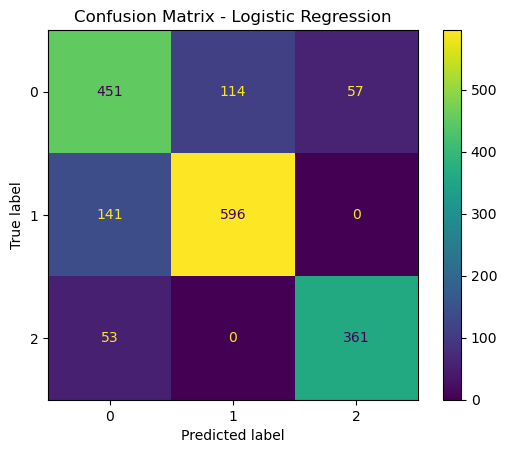

In [67]:
# Compute the confusion matrix
# 0 = call , 1 = raise, 3 = fold

cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='viridis', values_format='d')

# Add a title for clarity
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

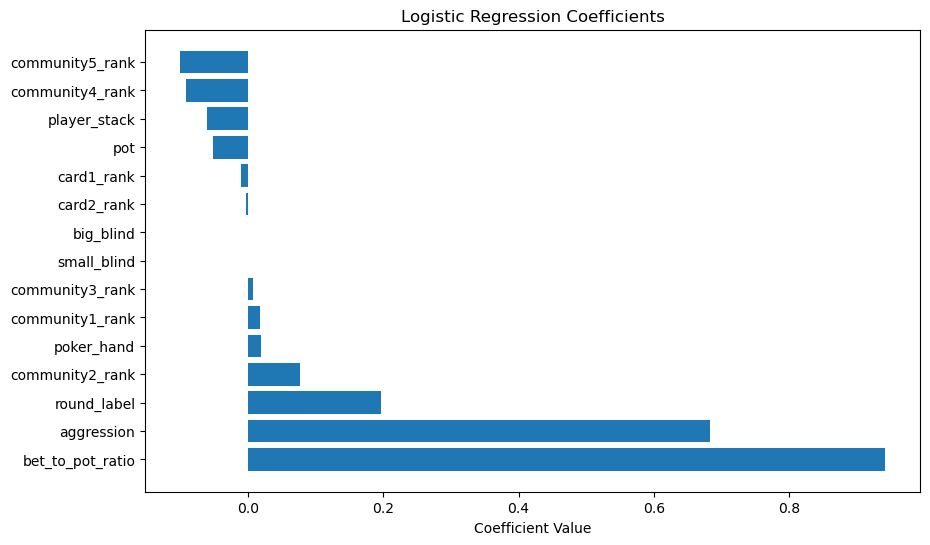

In [60]:
# Coefficients
coefficients = log_reg.coef_[0]  
features = X.columns  

# Make # DF for easier handling
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')

plt.savefig('../images/Logistic_Regression_Coefficients.png', format='png', dpi=300)
plt.show()

In [42]:
coef_df.round(2)

,Feature,Coefficient
13,bet_to_pot_ratio,0.94
14,aggression,0.68
0,round_label,0.20
9,community2_rank,0.08
5,poker_hand,0.02
8,community1_rank,0.02
10,community3_rank,0.01
3,small_blind,0.00
4,big_blind,0.00
7,card2_rank,-0.00


## 📝 Understand the coefficients from the Logistic Regression model, indicating how each feature influences the target variable (`action_label`).

#### Positive Coefficients:
- **bet_to_pot_ratio (0.94)**: Strong positive relationship. Higher bet-to-pot ratio increases the likelihood of actions.
- **aggression (0.68)**: Players with higher aggression are more likely to take actions.
- **round_label (0.20)**: Moderate positive effect, with later rounds increasing the likelihood of actions.
- **community2_rank (0.08)**: Slightly positive impact, stronger second community card favors certain actions.
- **poker_hand (0.02)**: Minor positive effect, suggesting stronger hands increase the probability of actions.
- **community1_rank (0.02)**, **community3_rank (0.01)**: Very small positive impact on action label.

### Negative Coefficients:

- **community4_rank (-0.09)**, **community5_rank (-0.10)**: Stronger 4th and 5th community cards slightly decrease the likelihood of certain actions like folding.
- **player_stack (-0.06)**: Larger player stack size slightly decreases the likelihood of certain actions, such as Fold.
- **pot (-0.05)**: Slight negative relationship; larger pot sizes may slightly increase the likelihood of folding.
- **card1_rank (-0.01)**, **card2_rank (-0.003)**: Very minor negative effect, indicating minimal influence of individual card ranks on action probabilities.

### Zero Coefficients:
- **small_blind (0.00)**, **big_blind (0.00)**: These features have no influence on the target variable.

### 📌 Summary:
- **Strongest positive influences:** `bet_to_pot_ratio`, `aggression`, `round_label`.
- **Strongest negative influences:** `community5_rank`, `community4_rank`, `player_stack`, `pot`.
- **Minimal effects:** `poker_hand`, `community1_rank`, `community2_rank`, `community3_rank`, `card1_rank`, `card2_rank`.